# The Central Limit Theorem

The *Central Limit Theorem* states that if we draw a simple random sample of size $n$ from any population with mean $\mu$ and standard deviation $\sigma$, if $n$ is large the distribuion of the sample means is approximately normal of the form

$$N(\mu, \frac{\sigma}{n})$$

This activity is meant to offer an example of the central limit theorem in action, and the effect of using different sample sizes in forming the distribution of sample means. 

### Baseball Salaries

![](images/baseballs.png)


The dataset below represents Major League Baseball player salaries from the year 2020, and was gathered from USA Today's databases. Below, the dataset is loaded and we examine the features and datatypes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#read in the data
baseball_salaries = pd.read_csv('data/baseball.csv', index_col=0)

In [3]:
#Examine the .info()
baseball_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 1 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         797 non-null    object
 1   leagueID     797 non-null    object
 2   player       797 non-null    object
 3   salary       797 non-null    int64 
 4   position     797 non-null    object
 5   gamesplayed  797 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 43.6+ KB


In [4]:
#First few rows
baseball_salaries.head()

,team,leagueID,player,salary,position,gamesplayed
1,ANA,AL,anderga0,6200000,CF,112
2,ANA,AL,colonba0,11000000,P,3
3,ANA,AL,davanje0,375000,CF,108
4,ANA,AL,donnebr0,375000,P,5
5,ANA,AL,eckstda0,2150000,SS,142


### Task

Our goal is to take samples from the salary data and build a distribution of these sample means.  To begin, draw a histogram of the salaries.  Note the skew and lack of normality in this distribution.    

Actual mean:2497668.6850690087
Actual standard deviation:3535924.969930462


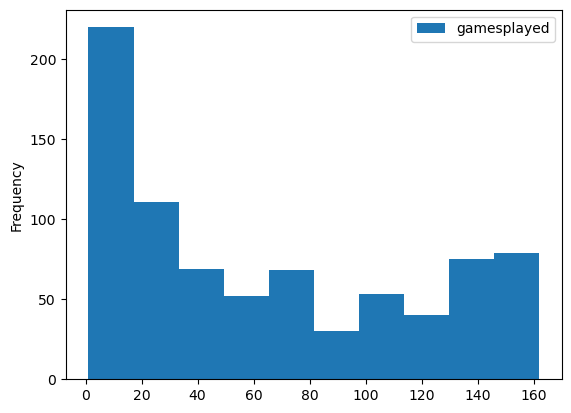

In [41]:
#histogram of the salaries
baseball_salaries.plot(kind='hist', x='salary')
orig_mean = baseball_salaries['salary'].mean()
orig_std = baseball_salaries['salary'].std()
print('Actual mean:'+str(orig_mean))
print('Actual standard deviation:'+str(orig_std))


### Taking Samples

Pandas DataFrame's have built in methods for taking random samples with replacement.  The `.sample()` method is demonstrated below.

In [37]:
baseball_salaries['salary'].sample(4)

781     750000
619    2500000
586    6150000
653    1950000
Name: salary, dtype: int64

### Sample Means

Now, use this method to repeatedly take samples and build a list of sample means.  As a starting place let us take 1000 samples of size 5 and draw the histogram of the sample means.  What is the mean and standard deviation? 

Sample size 5
***************
Sample Mean: 2422051.3408000004
Sample Standard deviation: 1452539.0513711374


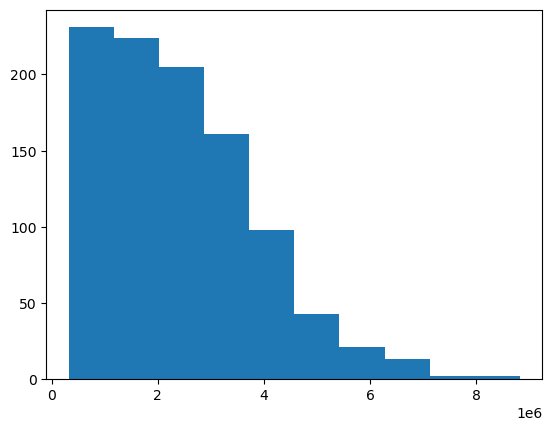

Sample size 10
***************
Sample Mean: 2478726.292
Sample Standard deviation: 1129097.8749876763


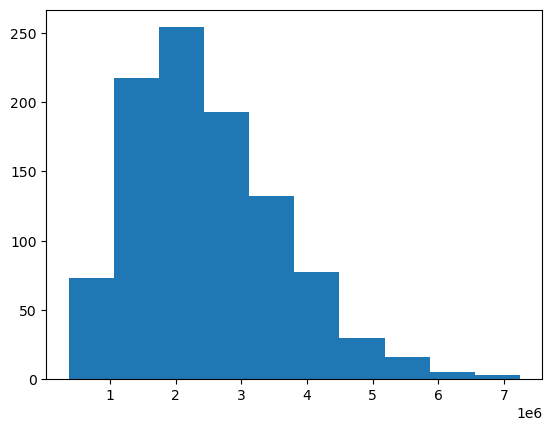

Sample size 25
***************
Sample Mean: 2533499.623
Sample Standard deviation: 715819.7242661007


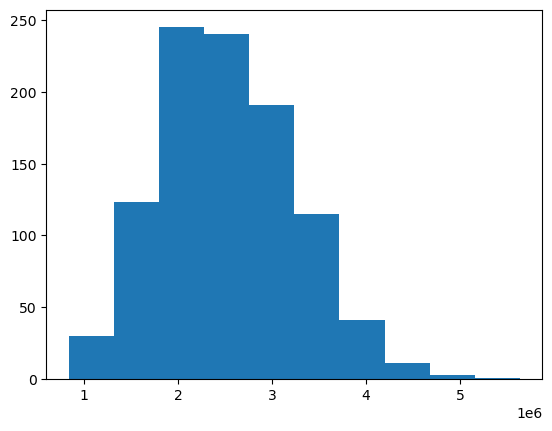

Sample size 50
***************
Sample Mean: 2511903.2538
Sample Standard deviation: 497275.9090062173


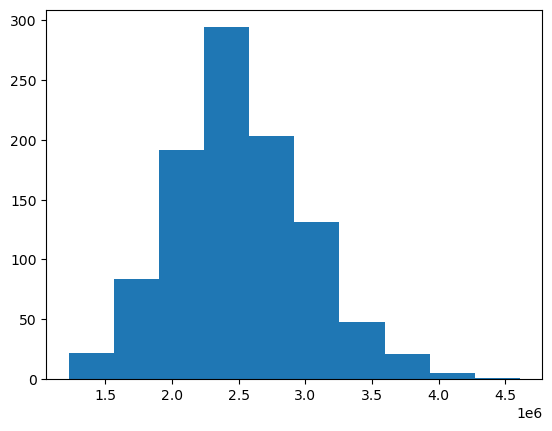

Sample size 100
***************
Sample Mean: 2499133.1799899996
Sample Standard deviation: 330231.9040417525


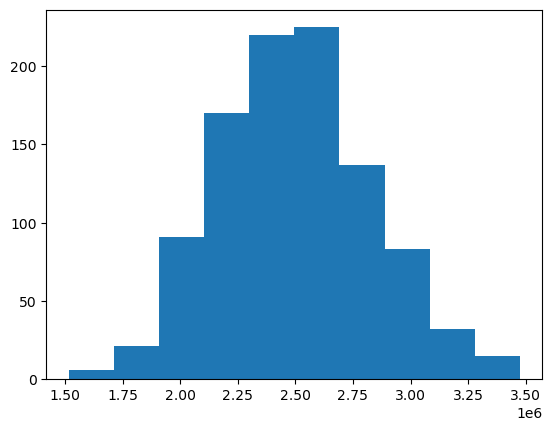

In [38]:
#empty list for sample means
sample_sizes = [5, 10, 25, 50, 100]
for size in range(0, 5):
    sample_means = []
    print("Sample size " + str(sample_sizes[size]))
    print("***************")
    for i in range(1000):
        sample = baseball_salaries['salary'].sample(sample_sizes[size])
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
        pass
    mean = np.mean(sample_means)
    std = np.std(sample_means)
    print('Sample Mean: '+ str(mean))
    print('Sample Standard deviation: '+ str(std))     
    #histogram of sample means
    plt.hist(sample_means)
    plt.show()

Repeat the above exercise with samples of size:

- 10
- 25
- 50
- 100

Your discussion post should explain how the distribution of these sample means changes as the sample size changes, and how the mean and standard deviation of the distributions change.